In [31]:
import pandas as pd
import numpy as np

names = ['Monika', 'Lalit', 'purva']
s = pd.Series(names,index=['Student_1','Student_2','Student_3'])
s.iloc[2]
s.loc['Student_2']











'Lalit'

       Size (sq. ft.)  Number of Rooms  Number of Bathrooms  Year Built  \
count       100.00000       100.000000           100.000000    100.0000   
mean       2446.83000         4.330000             2.290000   1996.2900   
std         994.25545         1.746888             1.047315     14.4098   
min         802.00000         2.000000             1.000000   1970.0000   
25%        1593.25000         3.000000             1.000000   1986.0000   
50%        2556.50000         5.000000             2.000000   1995.0000   
75%        3310.75000         6.000000             3.000000   2009.0000   
max        3989.00000         7.000000             4.000000   2022.0000   

       Distance to City Center (km)  Nearby Amenities    Price (USD)  
count                     100.00000        100.000000     100.000000  
mean                       28.04300          7.660000  567739.200000  
std                        13.13951          4.443177  259394.453134  
min                         2.00000     

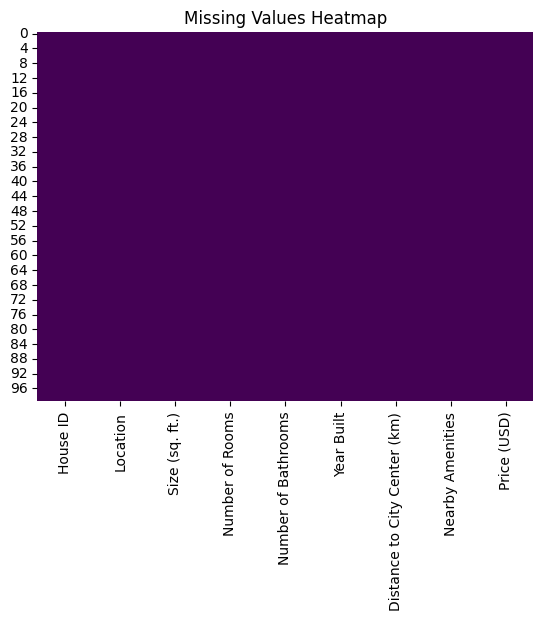

House ID                         object
Location                         object
Size (sq. ft.)                    int64
Number of Rooms                   int64
Number of Bathrooms               int64
Year Built                        int64
Distance to City Center (km)    float64
Nearby Amenities                  int64
Price (USD)                       int64
dtype: object


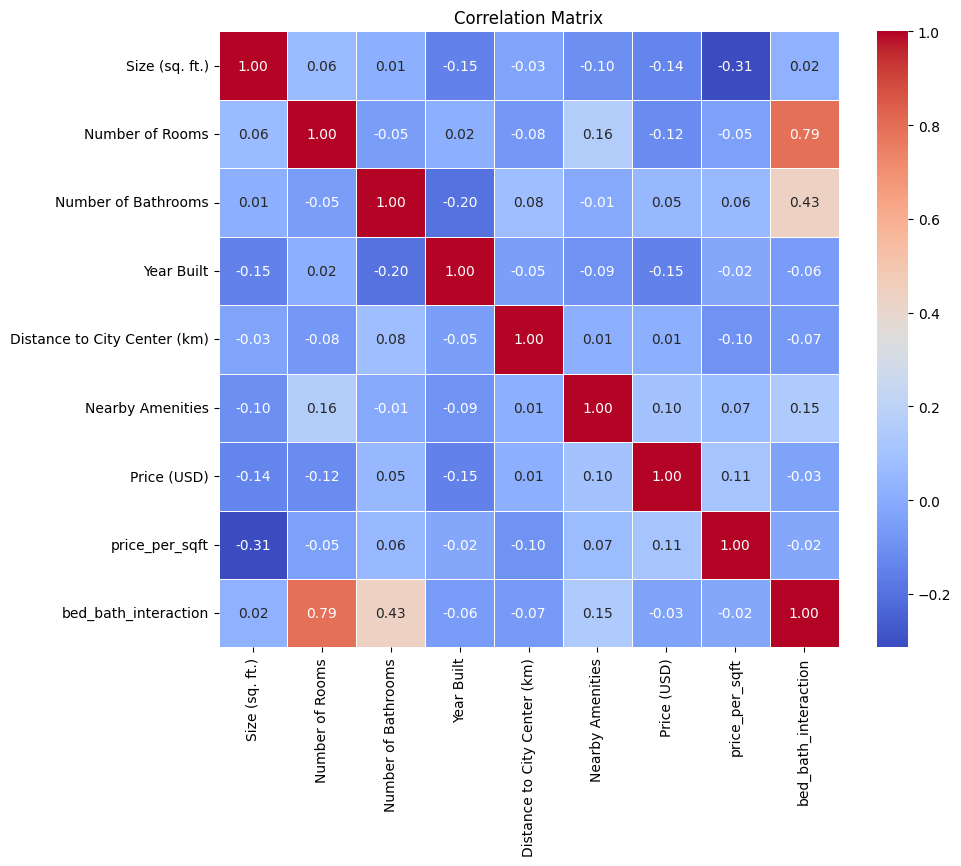

NaN values per column:
 Size (sq. ft.)                  0
Number of Rooms                 0
Number of Bathrooms             0
Year Built                      0
Distance to City Center (km)    0
                               ..
House ID_H096                   0
House ID_H097                   0
House ID_H098                   0
House ID_H099                   0
House ID_H100                   0
Length: 109, dtype: int64
Training set size: (79, 109)
Testing set size: (20, 109)
Mean Absolute Error (MAE): 266561.69298317644
Mean Squared Error (MSE): 96511286563.45375
R-squared: -0.0687699841714251


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Load the dataset
df = pd.read_csv("/Users/jagz/Downloads/house_prices_dataset.csv")

# Basic descriptive statistics
numeric_columns = df.select_dtypes(include='number')
print(numeric_columns.describe())  # Descriptive stats for numeric columns
print(numeric_columns.median())   # Median values for numeric columns

# Check for missing values
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

print(df.dtypes)

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize
scaler = MinMaxScaler()
df[["Size (sq. ft.)", "Number of Rooms"]] = scaler.fit_transform(df[["Size (sq. ft.)", "Number of Rooms"]])

# Create a new feature(Price per square foot)
df['price_per_sqft'] = df['Price (USD)'] / df['Size (sq. ft.)']

# Interaction feature(bedrooms * bathrooms)
df['bed_bath_interaction'] = df['Number of Rooms'] * df['Number of Bathrooms']

# One-hot encode the location column
df = pd.get_dummies(df, columns=['Location'], drop_first=True)
df = pd.get_dummies(df, columns=['House ID'], drop_first=True)

#calculate the correlation matrix

correlation_matrix = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


from sklearn.model_selection import train_test_split

# Replace inf values with NaN for easier handling
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values
print("NaN values per column:\n", X.isna().sum())

# Drop rows with NaN values (or use an imputation strategy)
X.dropna(inplace=True)
y = y[X.index]  # Ensure target variable matches cleaned features

# split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Initialize and train the model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

In [33]:
import pandas as pd
import numpy as np

df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
df2



,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo
